# Zipcode data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn

# Load the file with training data
file = pd.read_csv('data/zip.train', ' ', header=None)    
print(file.head())

   0    1    2    3      4      5      6      7      8      9    ...    248  \
0  6.0 -1.0 -1.0 -1.0 -1.000 -1.000 -1.000 -1.000 -0.631  0.862  ...  0.823   
1  5.0 -1.0 -1.0 -1.0 -0.813 -0.671 -0.809 -0.887 -0.671 -0.853  ... -0.671   
2  4.0 -1.0 -1.0 -1.0 -1.000 -1.000 -1.000 -1.000 -1.000 -1.000  ... -1.000   
3  7.0 -1.0 -1.0 -1.0 -1.000 -1.000 -0.273  0.684  0.960  0.450  ...  1.000   
4  3.0 -1.0 -1.0 -1.0 -1.000 -1.000 -0.928 -0.204  0.751  0.466  ...  0.639   

     249    250    251    252    253    254    255  256  257  
0  1.000  0.482 -0.474 -0.991 -1.000 -1.000 -1.000 -1.0  NaN  
1 -0.033  0.761  0.762  0.126 -0.095 -0.671 -0.828 -1.0  NaN  
2 -1.000 -0.109  1.000 -0.179 -1.000 -1.000 -1.000 -1.0  NaN  
3  0.536 -0.987 -1.000 -1.000 -1.000 -1.000 -1.000 -1.0  NaN  
4  1.000  1.000  0.791  0.439 -0.199 -0.883 -1.000 -1.0  NaN  

[5 rows x 258 columns]


In [2]:
# Create feature vector
X = pd.DataFrame()
count = 0

for i in file.columns:
    X.insert(count, i, file[i])
    count += 1
X = X.drop([257], axis=1)
# print(X)

Number: 6


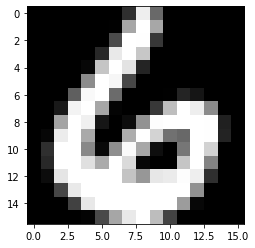

In [3]:
# Plot data image
img = np.array(X.loc[0])
label = int(img[0])
img = img[1:]
img = img.reshape((16, 16))
print(f"Number: {label}")
imgplot = plt.imshow(img, cmap='gray')

In [4]:
validation = int(X.shape[0] * 0.2)
train = int(X.shape[0] * 0.8)
print(validation)
print(train)

1458
5832


In [5]:
# Split the data
X_train = X[:train]
X_validation = X[train:]
Y_train = X_train[[0]]
Y_validation = X_validation[[0]]
print(X_train.shape)
print(X_validation.shape)
print(Y_train.shape)
print(Y_validation.shape)

(5832, 257)
(1459, 257)
(5832, 1)
(1459, 1)


In [6]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

# Create Linear model
model = linear_model.LogisticRegression(random_state=0, max_iter=1500) # Logistic regression

In [7]:
# Fit the model
model.fit(X_train, Y_train.values.ravel())

LogisticRegression(max_iter=1500, random_state=0)

In [8]:
# Make a prediction
Y_pred = model.predict(X_train)

In [9]:
# Print the results
print(f'Score: {model.score(X_train,Y_train)}')
print(f'Intercept: {model.intercept_}')
print(f'Mean squared error (MSE): {mean_squared_error(Y_train, Y_pred)}')
print(f'Coefficient of determination (R^2): {r2_score(Y_train, Y_pred)}')

Score: 1.0
Intercept: [ 17.92733826   6.3220407   19.4477865   10.04136599   1.87838994
   4.76552921 -11.22054956  -7.45255026 -12.45440032 -29.25495047]
Mean squared error (MSE): 0.0
Coefficient of determination (R^2): 1.0


## K-nearest neighbors classification

In [10]:
from sklearn.neighbors import KNeighborsClassifier
acc = 0
neighbors = 0
for i in range(3, 16, 2):
    print(f"KNN n_neighbors = {i}")
    cls = KNeighborsClassifier(n_neighbors=i)
    cls.fit(X_train, Y_train.values.ravel())
    cls_pred = cls.predict(X_validation)
    score = cls.score(X_validation, Y_validation)
    if score > acc:
        acc = score
        neighbors = i
    print(f"Accuracy score: {score}")
    print("-----------------------------")
print(f"Best Accuracy score: {acc}")
print(f"KNN n_neighbors = {neighbors}")

KNN n_neighbors = 3
Accuracy score: 0.9794379712131597
-----------------------------
KNN n_neighbors = 5
Accuracy score: 0.980123372172721
-----------------------------
KNN n_neighbors = 7
Accuracy score: 0.978067169294037
-----------------------------
KNN n_neighbors = 9
Accuracy score: 0.9732693625771076
-----------------------------
KNN n_neighbors = 11
Accuracy score: 0.976010966415353
-----------------------------
KNN n_neighbors = 13
Accuracy score: 0.976010966415353
-----------------------------
KNN n_neighbors = 15
Accuracy score: 0.973954763536669
-----------------------------
Best Accuracy score: 0.980123372172721
KNN n_neighbors = 5


In [11]:
cls = KNeighborsClassifier(n_neighbors=neighbors)
cls.fit(X_train, Y_train.values.ravel())
cls_pred = cls.predict(X_validation)
score = cls.score(X_validation, Y_validation)
print(f"Accuracy score: {score}")
print(f"KNN n_neighbors = {neighbors}")

Accuracy score: 0.980123372172721
KNN n_neighbors = 5


# Test data

In [12]:
# Load the file with test data
test_file = pd.read_csv('data/zip.test', ' ', header=None)
Y_test_file = test_file[[0]]

In [13]:
# Check the shape of inputs
print(f"Test data shape: {test_file.shape}")
print(f"Labels shape (Y): {Y_test_file.shape}")

Test data shape: (2007, 257)
Labels shape (Y): (2007, 1)


## Logistic regression

In [14]:
# Make a prediction
test_data_pred = model.predict(test_file)

In [15]:
# Print the results
print(f'Score: {model.score(test_file, Y_test_file)}')
print(f'Intercept: {model.intercept_}')
print(f'Mean squared error (MSE): {mean_squared_error(Y_test_file, test_data_pred)}')
print(f'Coefficient of determination (R^2): {r2_score(Y_test_file, test_data_pred)}')

Score: 0.9681116093672147
Intercept: [ 17.92733826   6.3220407   19.4477865   10.04136599   1.87838994
   4.76552921 -11.22054956  -7.45255026 -12.45440032 -29.25495047]
Mean squared error (MSE): 0.12406576980568013
Coefficient of determination (R^2): 0.9863764369550464


## K-nearest neighbors classification

In [16]:
# Make a prediction
test_data_classification = cls.predict(test_file)

In [17]:
# Check the shape of data
print(f"Test classification data shape: {test_file.shape}")
print(f"Labels shape (Y): {Y_test_file.shape}")

Test classification data shape: (2007, 257)
Labels shape (Y): (2007, 1)


In [18]:
# Print the score
score_class = cls.score(test_file, Y_test_file)
prob_class = cls.predict_proba(test_file)
print(f"Accuracy score: {score_class}")

Accuracy score: 0.9636273044344793


## PCA

I create PCA model with all the features to see how the variance change with different number of components.

In [19]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import normalize

# Create PCA model
pca = PCA()

x_norm = normalize(X_train)

# Fit and transform the model
pca.fit(x_norm)

PCA()

In [30]:
print(f"PCA score : {pca.score(x_norm)}")
print(f"PCA noise variance : {pca.noise_variance_}")
print(f"PCA variance ration : {np.cumsum(pca.explained_variance_ratio_)[256]}")

PCA score : 679.5650915212956
PCA noise variance : 0.0
PCA variance ration : 0.9999999999999994


Text(0, 0.5, 'Variance explained')

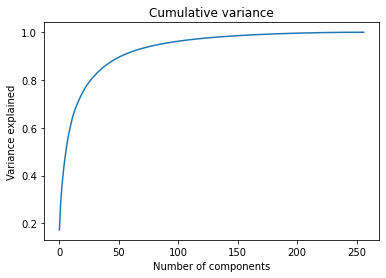

In [21]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.title('Cumulative variance')
plt.xlabel('Number of components')
plt.ylabel('Variance explained')

In [22]:
cumvar = np.cumsum(pca.explained_variance_ratio_)

In [23]:
cumvar[55]

0.9071407951971542

In [24]:
# Transform the data to 55 dimension
pca_55 = PCA(n_components=55)
X_pca = pca_55.fit_transform(X_train)

# Split into train and test data
X_pca_train = X_pca[:5291]
X_pca_test = X_pca[5291:]
Y_pca_train = Y_train[:5291]
Y_pca_test = Y_train[5291:]

In [25]:
print(f"X train data shape: {X_pca_train.shape}, X test data shape: {X_pca_test.shape}")
print(f"Y train data shape: {Y_pca_train.shape},Y test data shape: {Y_pca_test.shape}")

X train data shape: (5291, 55), X test data shape: (541, 55)
Y train data shape: (5291, 1),Y test data shape: (541, 1)


In [26]:
# Create new KNN Model and fit it
pca_cls = KNeighborsClassifier(n_neighbors=neighbors)
pca_cls.fit(X_pca_train, Y_pca_train.values.ravel())

KNeighborsClassifier()

In [27]:
# Make a prediction
pca_predict = pca_cls.predict(X_pca_test)

In [29]:
score_class_pca = pca_cls.score(X_pca_test, Y_pca_test)
score_pca = pca_55.score(X_train)
explained_variance = np.cumsum(pca_55.explained_variance_ratio_)
print(f"KNN score: {score_class_pca}")
print(f"PCA noise variance : {pca_55.noise_variance_}")
print(f"PCA score: {score_pca}")
print(f"PCA variance: {explained_variance[54]}")

KNN score: 0.9815157116451017
PCA noise variance : 0.05984597516894618
PCA score: -81.43974208145485
PCA variance: 0.9065595247946785
